In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import preprocessing

# Basic notions of kNN (k-Nearest Neighbours)

"k-Nearest Neighbours" is a classification algorithm based on Euclidian Distance. It receives data coordinates (values) from an unseen instance in the problem domain, and calculates the Euclidian Distance between this unseen instance's data point and the nearest, already labeled, data points. The assigned label to this unseen data is merely the most popular label between these chosen nearest data points.

The number of considered nearest labeled data points is not fixed, but instead is a parameter "k" set by the user. Hence the name k-Nearest Neighbours.

In [2]:
# kNN intuition
from IPython.display import Image
Image(url="https://miro.medium.com/v2/resize:fit:1358/0*jqxx3-dJqFjXD6FA")

## Obtaining Data

In [3]:
# Source: https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-data

df = pd.read_csv('./breast-cancer.csv')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [4]:
# Information about the dataframe: column names, data types, null value counts, etc

df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

## Scrubbing Data

In [5]:
# 'id' column won't help us predict our diagnosis, so we'll drop that.

df.drop('id', axis=1, inplace=True)

In [6]:
# Let's replace 'B' and 'M' with 0 and 1

df['diagnosis'] = df['diagnosis'].replace({'B': 0, 'M': 1})

There aren't any NaN values and all columns conveniently hold numerical values, so we wont't need any encoding.

## Exploring Data

diagnosis
0    357
1    212
Name: count, dtype: int64


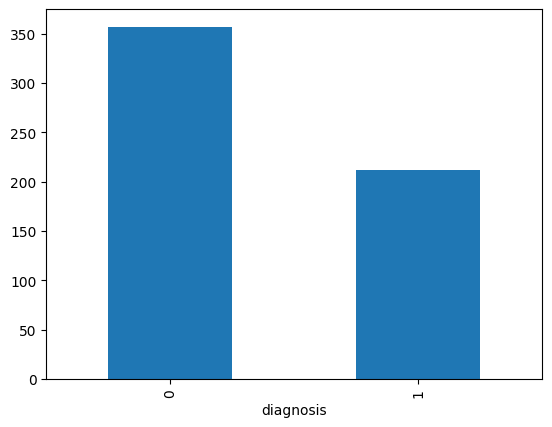

In [7]:
# Checking label/class distribution

print(df['diagnosis'].value_counts())
p = df['diagnosis'].value_counts().plot(kind="bar")

Remember, 0 is "Benign" and 1 is "Malignant"

Most instances of the dataset are of Benign cancer.

In this dataset, "Benign" outnumber "Maglignant" at a rate of approximately 1,68 : 1

In [8]:
# Basic statistical analysis

# count ---> number of NoN-empty rows in a feature.
# mean ---> mean value of that feature.
# std ---> Standard Deviation Value of that feature.
# min ---> minimum value of that feature.
# 25%, 50%, and 75% ---> percentile/quartile of each features. This quartile information helps us detect Outliers.
# max ---> maximum value of that feature.

df.describe().T

,count,mean,std,min,25%,50%,75%,max
diagnosis,569.0,0.372583,0.483918,0.000000,0.000000,0.000000,1.000000,1.00000
radius_mean,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
texture_mean,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
perimeter_mean,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
area_mean,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
smoothness_mean,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
compactness_mean,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
concavity_mean,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
concave points_mean,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
symmetry_mean,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400


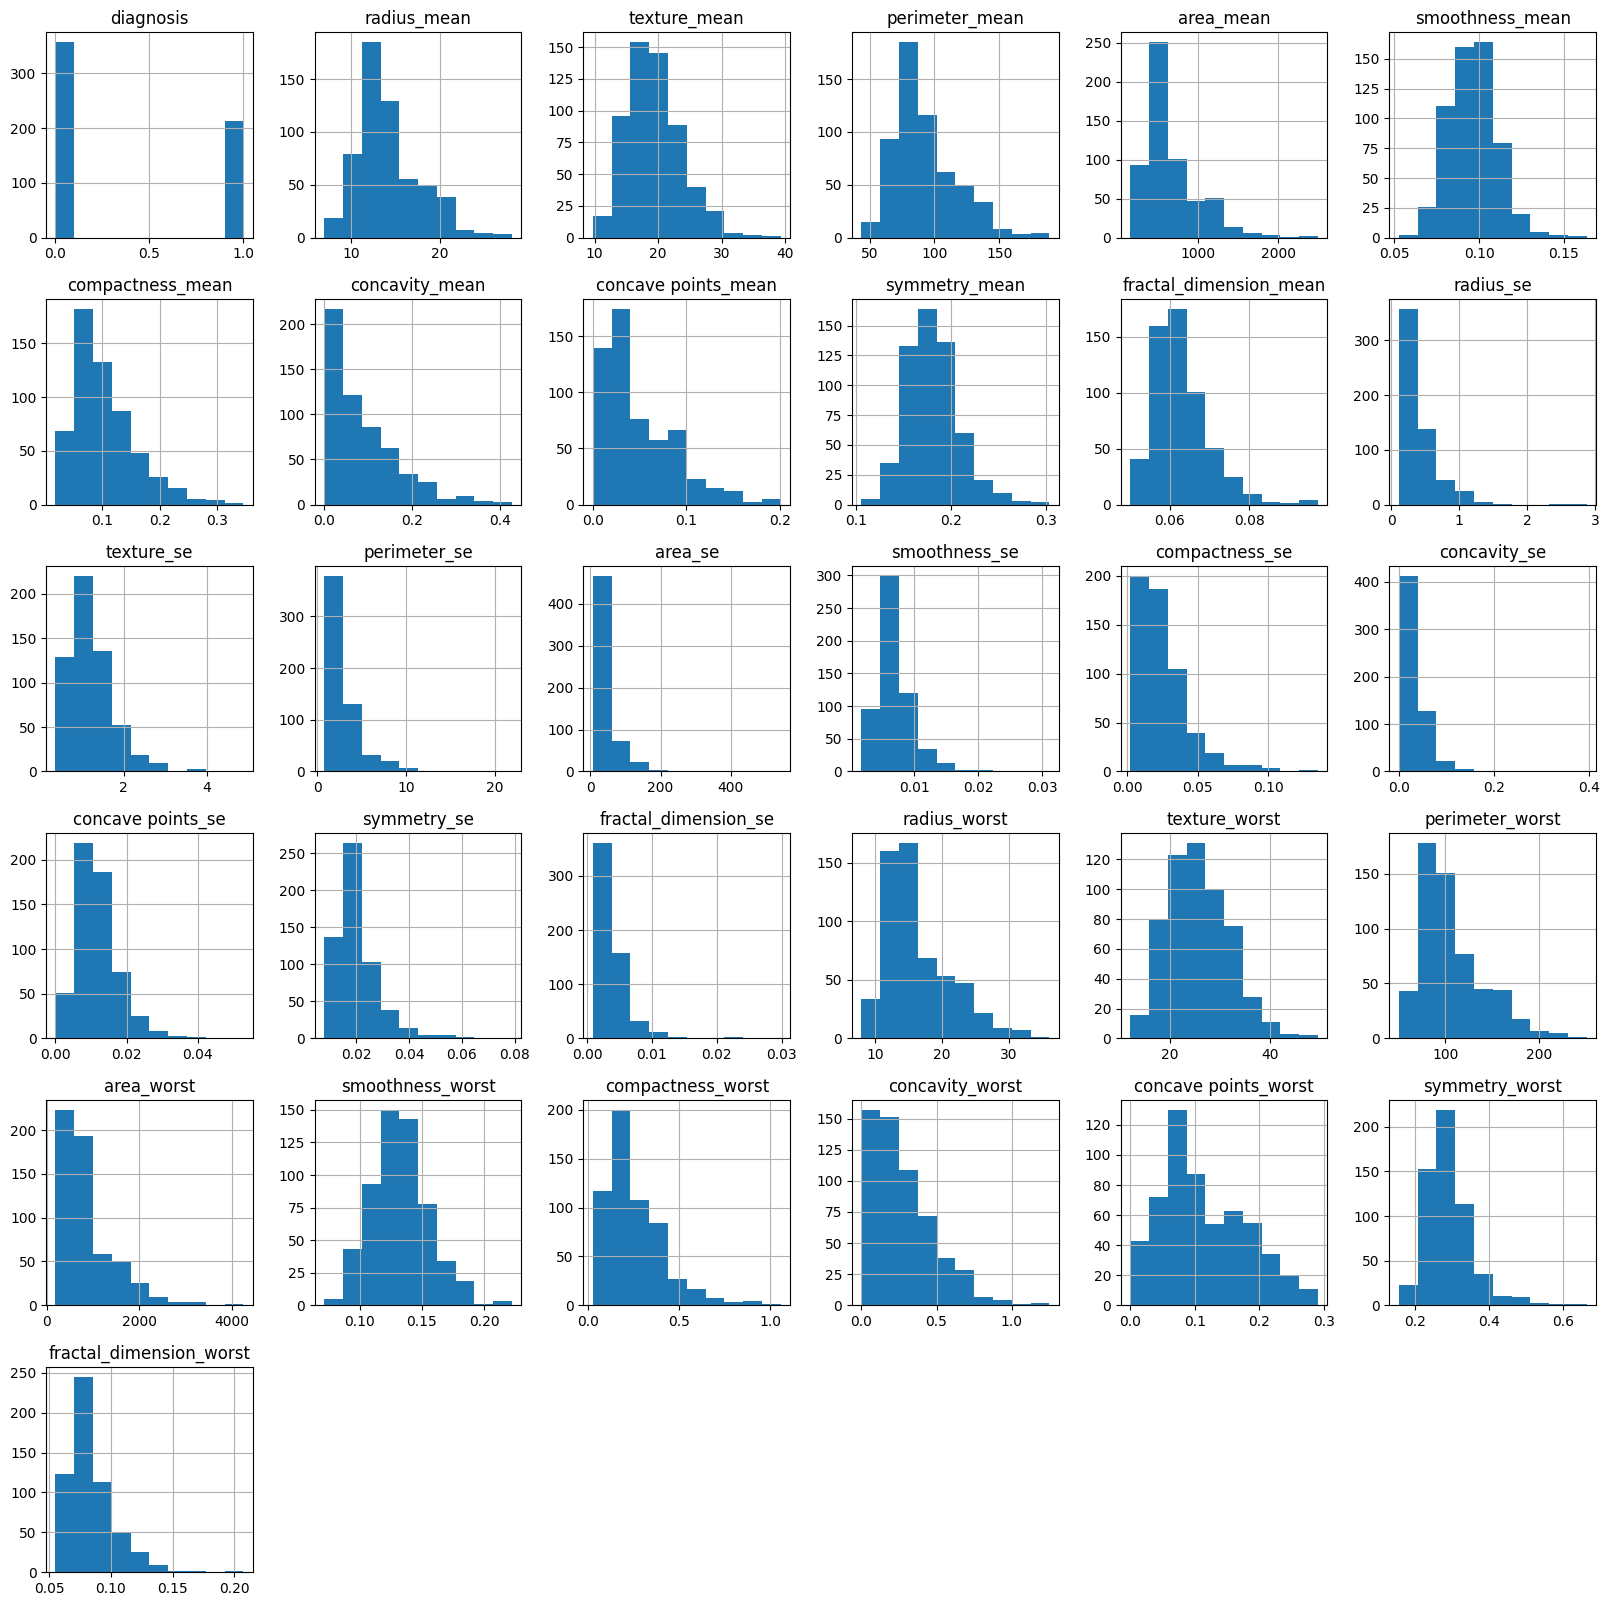

In [9]:
# Histogram for each feature

p = df.hist(figsize = (20,20))

Sometimes, when analysing a feature, the "0" value shouldn't be possible, and instead indicates the value in that instance is missing. Some datasets make this design choice, instead of inputing a "null" value. So we have to keep an eye on that when the minimum value of a column is "0".

In this case, a cell's "concavity" and "concave points" are characteristics that can present the value 0 in the problem domain. So it's not an issue for this dataset.

## Feature Selection

"Garbage In, Garbage Out" you may have heard of this before. Even though our data is properly "scrubbed", doesn't have any NaN values, doesn't have any counterproductive 0s, and is properly encoded, it is still possible that whole features may be dropped if we identify that they aren't gonna help the model to predict our target right. So we should select which features are gonna be used for training, and which ones aren't.

Sometimes, we should drop features even if they do carry some degree of predictive information. That's because each new feature is a new dimension, and many ML algorithms don't deal well with a high number of dimensions, causing their accuracy to drop in response to too many features being added for training, again, even if they carry some useful information. This is known as the "curse of dimensionality", and you can read about it in more detail here: https://www-visiondummy-com.translate.goog/2014/04/curse-dimensionality-affect-classification/?_x_tr_sl=auto&_x_tr_tl=en&_x_tr_hl=pt-BR.

Another thing to have in mind is that, sometimes, dropping features **can marginaly reduce our model's accuracy and still be desirable**, if in return it can: improve our ability to interpret the model, reduce significantly the training cost, or facilitate the maintenance and expansion of the current dataset. Thus, feature selection is important, and we will be looking at some things that come into play in it.

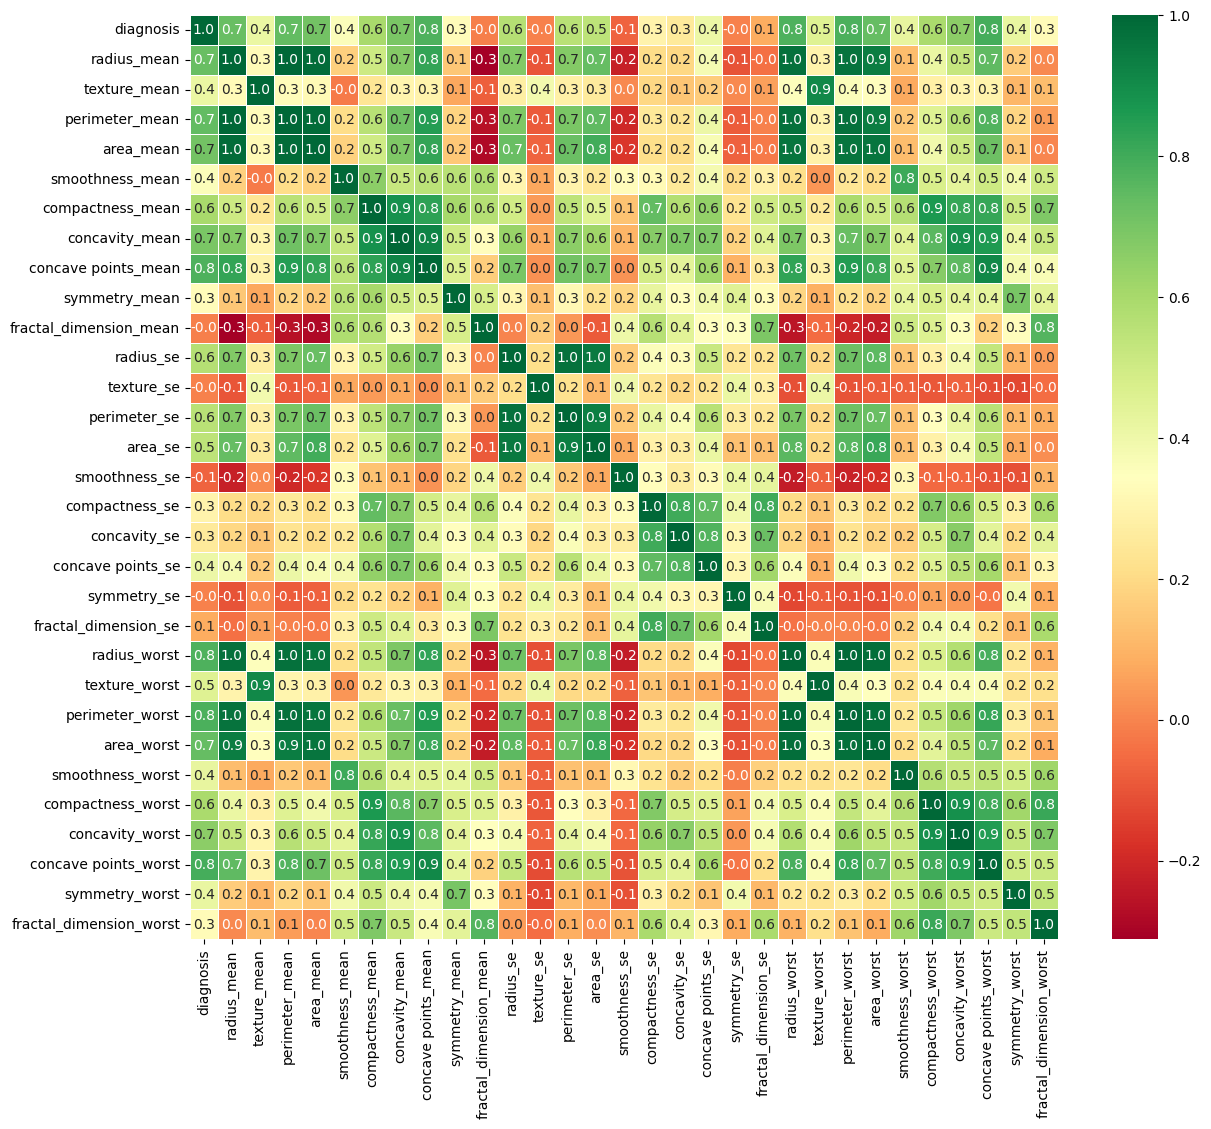

In [10]:
# Heatmap of correlation between features (and also the target value)
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(14,12))
p=sns.heatmap(df.corr(), annot=True, cmap ='RdYlGn', fmt=".1f",linewidths=0.5)
# plt.savefig('heatmap.png')

Although the correlation matrix doesn't dictate what we should do with our features, it gives us a good idea about the possible impact they may have on our model.

By looking at "diagnosis" column, we can gain a sense of the predictive power each feature would have if used alone. Of course, in some ML algorithms, features' effects on model training aren't independent of each other. Still, this column can tell us something. Correlation is a measure of how much these variables are **linearly related**, and we can see that columns have approximately 0.0, or even negative correlation with "diagnosis".

Of course, we aren't concerned only with linear relations, but still, such low correlation values can indicate that these columns probably aren't gonna be adding much to our model's performance. We can double check using the "Information Gain" criterion with sklearn.feature_selection.mutual_info_regression, which captures even non-linear relations between each feature and the target variable using the concept of "entropy".

In [11]:
# Separating the dataframe feature columns (X) and target column (y)
feature_columns = df.columns.tolist()
feature_columns.remove('diagnosis')

X = df[feature_columns]
y = df['diagnosis']

In [12]:
from sklearn.feature_selection import mutual_info_regression

# Calculating information gain
ig = mutual_info_regression(X, y)

# Creating and sorting a dataframe by information gain (importance) value
feature_importance = pd.DataFrame({'feature': feature_columns, 'importance': ig})
feature_importance = feature_importance.sort_values('importance', ascending=False)

# Printing
print(feature_importance)

                    feature  importance
22          perimeter_worst    0.479320
23               area_worst    0.462234
20             radius_worst    0.455199
27     concave points_worst    0.441667
7       concave points_mean    0.438567
2            perimeter_mean    0.404850
6            concavity_mean    0.375364
0               radius_mean    0.369474
3                 area_mean    0.359511
13                  area_se    0.337854
26          concavity_worst    0.316165
12             perimeter_se    0.272926
10                radius_se    0.244953
25        compactness_worst    0.224189
5          compactness_mean    0.212192
17        concave points_se    0.127592
21            texture_worst    0.121676
16             concavity_se    0.117453
24         smoothness_worst    0.104140
1              texture_mean    0.093788
28           symmetry_worst    0.090217
4           smoothness_mean    0.078685
15           compactness_se    0.074816
29  fractal_dimension_worst    0.065048


Looking at these, we can see the results are pretty similar. All "low correlation" features also have "low information gain", and are prime candidates for getting dropped out of our selected features. We'll go with a rather simplistic approach and select only features with information gain higher than 0.2, which are the 15 first features in the "feature_importance" dataframe. All the other 15 will be dropped.


In [13]:
# Creating copy of X before dropping
X_copy = X.copy()

# Collecting the name of the last 15 features in "feature_importance" and dropping them
for i in range(15,30):
    
    feature_name = feature_importance['feature'].iloc[i]
    
    X_copy.drop(feature_name, axis=1, inplace=True)

# Let's save this dataframe version as X_FS
X_FS = X_copy

In [14]:
X_FS.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   radius_mean           569 non-null    float64
 1   perimeter_mean        569 non-null    float64
 2   area_mean             569 non-null    float64
 3   compactness_mean      569 non-null    float64
 4   concavity_mean        569 non-null    float64
 5   concave points_mean   569 non-null    float64
 6   radius_se             569 non-null    float64
 7   perimeter_se          569 non-null    float64
 8   area_se               569 non-null    float64
 9   radius_worst          569 non-null    float64
 10  perimeter_worst       569 non-null    float64
 11  area_worst            569 non-null    float64
 12  compactness_worst     569 non-null    float64
 13  concavity_worst       569 non-null    float64
 14  concave points_worst  569 non-null    float64
dtypes: float64(15)
memory u

## Modeling

### Train-test split

There are certain problems to be aware of before splitting our data into train and test sets.

We want to make sure neither the train or test set gets an unrepresentative amount of the labels. For example, it can lead our model to "learn too little" about one class in the training set, and then getting tested with many more cases in the test set. So, to guarantee our split will be representative of the label distribution, we use the parameter 'stratify=y' in the method train_test_split().

Also, to ensure our results will be reproductible, we set random_state=1, which gives us a determined train-test split.

In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_FS, y, test_size=30/100, random_state=1, stratify=y)

In [16]:
X.shape

(569, 30)

### Normalizing data

Often, different features often come in different scales. Imagine we're dealing with a dataset of accademic grades where discipline X grades go from 0 to 100 and discipline Y's go from 0 to 10. If we were building a classifier for predicting a student's grade in discipline Z based on these other 2, our classifier would barely be affected by discipline Y, even if our domain knowledge tells us that both X and Y are equally important.

kNN is a distance based algorithm, that means it's sensible to data scale. And as we saw in df.describe().T, not all our features have the same scale (tip: they never do), so it is highly recommended to normalize our features **before** training with kNN.

It's also important to not use training data to normalize test data. That would mean we aren't simply scaling the test data, but instead also transforming it with information obtained from the training data. We call this **data leakage**.

For normalizing, we'll use sklearn's StandardScaler:
- .fit_transform(X_train): uses X_train to adjust the scaler's internal attributes (like "mean" and a "variance") to X_train and returns a normalized version of X_train
- .transform(X_test): returns a normalized version of X_test, with the attributes previously adjusted by X_train

In [17]:
# Transforming y_train and y_test from column-vectors (n_samples,1) to 1D-arrays (n_samples,)
# sklearn's KNeighborsClassifier whines if we don't do it
y_train = np.ravel(y_train)
y_test = np.ravel(y_test)

# Normalizing train and test features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [18]:
# Representation of k-fold Cross Validation:
Image(url="https://scikit-learn.org/stable/_images/grid_search_cross_validation.png")

## kNN

### Training

First we'll train our model and get it's accuracy for just k = 4. After that we'll be trying different k numbers to check which one works best for this problem.

In [19]:
# Training model
from sklearn.neighbors import KNeighborsClassifier
k = 4
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)

# Predicting
yhat = neigh.predict(X_test)
yhat[0:5]

array([0, 1, 1, 0, 0], dtype=int64)

### Evaluating

For evalutaing, we'll use F1-score. Why? The F1-score metric penalises your model more for wrong predictions of classes that are in the minority within the dataset. In datasets where class distribution is very uneven, F1-score highlights your model inaccuracy better than the Jaccard Score.

Think about it this way, if a certain dataset has 2 classes 'A' and 'B' where for each 'A' we have 9 'B's, if we have a model that simply classifies every instance as 'B', Jaccard Score would give this model a 90% accuracy rate. However, if you think about it conceptually, in a dataset where the 'B'/'A' rate is 9:1, predicting an 'A' right is much more important than predicting a 'B', a class so abundant that can almost be taken as a "default value".

In this dataset, the label distribution isn't so uneven actually. The rate of "Benign" to "Malignant" cancer instances is approximately 1,68:1. Still, a minimal effect in the score still happens, and when thinking about it conceptually, letting a Malignant tumor (the class in the minority here) pass as Benign is a far more serious mistake than the other way around. For this reason, our evaluation metric will be F1-score.

In [20]:
# Evaluating the model
from sklearn.metrics import f1_score

print("Test set Accuracy (F1-Score): ", f1_score(y_test, yhat))

Test set Accuracy (F1-Score):  0.8888888888888888


Another way of evaluating our model and getting a better idea of where it is getting the predictions wrong, is through the confusion matrix, which shows us the right and wrong predictions for each one of the classes.

In [21]:
# The look of a Confusion-matrix:
Image(url="https://images.datacamp.com/image/upload/v1701364260/image_5baaeac4c0.png")

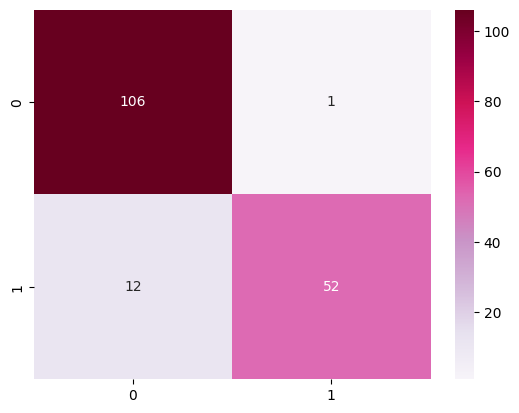

Our model mistook 1 Malignant case(s) for Benign, and 12 Benign case(s) for Malignant


In [22]:
# Visualizing our model's confusion matrix
from sklearn.metrics import confusion_matrix

cf_matrix = confusion_matrix(y_test, yhat)

sns.heatmap(cf_matrix, annot=True, fmt='.0f', cmap="PuRd")
plt.show()

print(f"Our model mistook {cf_matrix[0][1]} Malignant case(s) for Benign, and {cf_matrix[1][0]} Benign case(s) for Malignant")

### Testing different 'k' values

In [23]:
# How many k values we'll be testing
Ks = 60

mean_acc = np.zeros((Ks-1))

for n in range(1,Ks):
    
    # Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    
    # Get accuracies
    mean_acc[n-1] = f1_score(y_test, yhat)

mean_acc

array([0.90163934, 0.87931034, 0.90163934, 0.88888889, 0.90909091,
       0.89830508, 0.90756303, 0.88888889, 0.9       , 0.89830508,
       0.90909091, 0.9       , 0.9       , 0.90756303, 0.90756303,
       0.90756303, 0.90756303, 0.90756303, 0.90756303, 0.90756303,
       0.90756303, 0.90756303, 0.90756303, 0.90756303, 0.91666667,
       0.90756303, 0.90756303, 0.89830508, 0.89830508, 0.89830508,
       0.89830508, 0.89830508, 0.8907563 , 0.89830508, 0.89830508,
       0.89830508, 0.89830508, 0.89830508, 0.8907563 , 0.8907563 ,
       0.8907563 , 0.88135593, 0.88135593, 0.88888889, 0.88888889,
       0.88888889, 0.89830508, 0.88888889, 0.89830508, 0.89830508,
       0.89830508, 0.88888889, 0.88888889, 0.88888889, 0.88888889,
       0.88888889, 0.89830508, 0.89830508, 0.89830508])

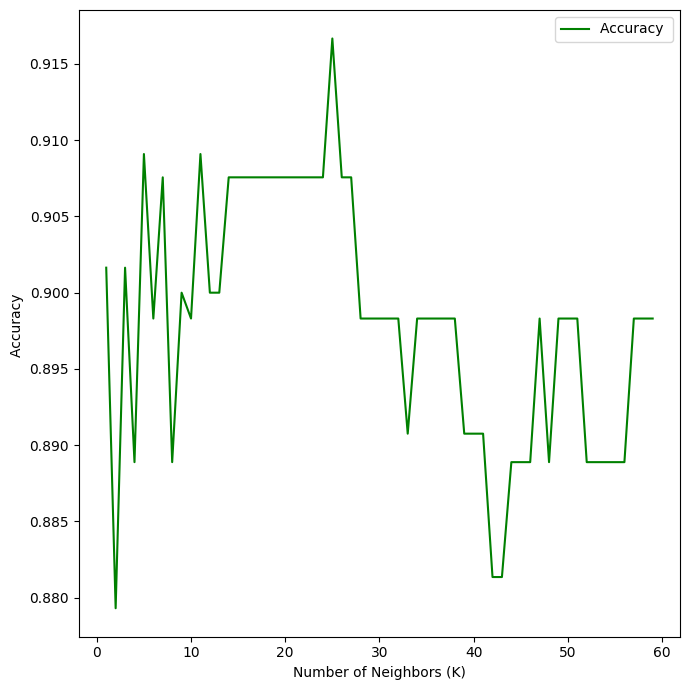

In [24]:
plt.figure(figsize=(7,7))
plt.plot(range(1,Ks),mean_acc,'g')
plt.legend(('Accuracy ', '+/- 1xstd','+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()

In [25]:
best_k = mean_acc.argmax()+1
print("The best accuracy was with", mean_acc.max(), "with k=", best_k) 

The best accuracy was with 0.9166666666666666 with k= 25


### Validating

We should know that not all training sets have the same 'suitability' for training our model.

Different training sets in the same dataset can present larger data diversity than others, or have less data noise than others. Thus, a good practice is to test our model against different train/test splits, and evaluating how it fares in all of them in average. That should give us a more solid idea of how accurate the model is against new real-world unseen data.

This technique is known as k-fold Cross Validation.

Also, keep in mind we still want to:
1) Stratify the data (maintain the proportion of labels seen in the whole dataset) every time we split it into new train and test sets. That's why we'll be using sklearn's StratifiedKFold class.
2) Normalize our data between the creating of each "fold" and the subsequent training. For that, the "estimator" parameter that cross_val_score will be receiving won't be simply our model "neigh", but instead a "Pipeline" object which allows us to chain pre-processing steps together with our final model, so we can normalize and train/predict, in sequence.

In [26]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score

# Creating "Pipeline" object
pipe = Pipeline([
    ('scale', StandardScaler()),
    ('clf', KNeighborsClassifier(n_neighbors=best_k))
])

neigh = KNeighborsClassifier(n_neighbors = best_k)
cv = StratifiedKFold(n_splits=5, random_state=1, shuffle=True)
scores = cross_val_score(pipe, X_FS, y, scoring='f1', cv=cv)

knn_score = np.mean(scores)
print(knn_score)

0.9076385967149019


## Alternative implementation: PCA

Feature Selection is a type of Dimensionality Recuction. Another DR technique, which doesn't involve directly dropping features, is Principal Component Analysis (PCA). We'll conduct PCA independently, for practice reasons.

PCA is a Linear Algebra technique that uses the calculated data variance along each feature and creates new features called "Principal Components" (PCs). Each PC represents a direction in our data feature space, and is formed from a linear combination of the original features: the features with higher coefficient in this linear combination are the most important ones in the composition of a particular PC, but not necessarily in the whole dataset. The idea is to substitute our model's data dimensions/axes, which used to be our original features, but now are gonna be the generated PCs.

In [27]:
# Graphical representation of computing 2 PCs from 2 features:
Image(url="https://miro.medium.com/v2/resize:fit:1400/1*V3JWBvxB92Uo116Bpxa3Tw.png")

We order PCs from the ones which hold a larger portion of our dataset variance, to the ones that hold the least. The feature that holds a bigger slice of "variance" we call PC1, the second we call PC2, and so on.

Remember: the goal is to reduce our number of dimensions, so contrary to what's being done in the picture above, we'll choose a number of PCs smaller than the number of original features. However, we can set a more objective, specific goal for how many PCs we want: select the set of PCs that together explain >95% of the dataset variance.

Before starting though, we'll need to feed PCA a normalized version of our feature set X.

### Visualizing PCs variance before adding to pipeline

In [28]:
scaler = StandardScaler()
scaler.fit(X)
X_PCA = scaler.transform(X)

In [29]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(X_PCA)
pca_ = pca.transform(X_PCA)

In [30]:
pca.explained_variance_ratio_

array([4.42720256e-01, 1.89711820e-01, 9.39316326e-02, 6.60213492e-02,
       5.49576849e-02, 4.02452204e-02, 2.25073371e-02, 1.58872380e-02,
       1.38964937e-02, 1.16897819e-02, 9.79718988e-03, 8.70537901e-03,
       8.04524987e-03, 5.23365745e-03, 3.13783217e-03, 2.66209337e-03,
       1.97996793e-03, 1.75395945e-03, 1.64925306e-03, 1.03864675e-03,
       9.99096464e-04, 9.14646751e-04, 8.11361259e-04, 6.01833567e-04,
       5.16042379e-04, 2.72587995e-04, 2.30015463e-04, 5.29779290e-05,
       2.49601032e-05, 4.43482743e-06])

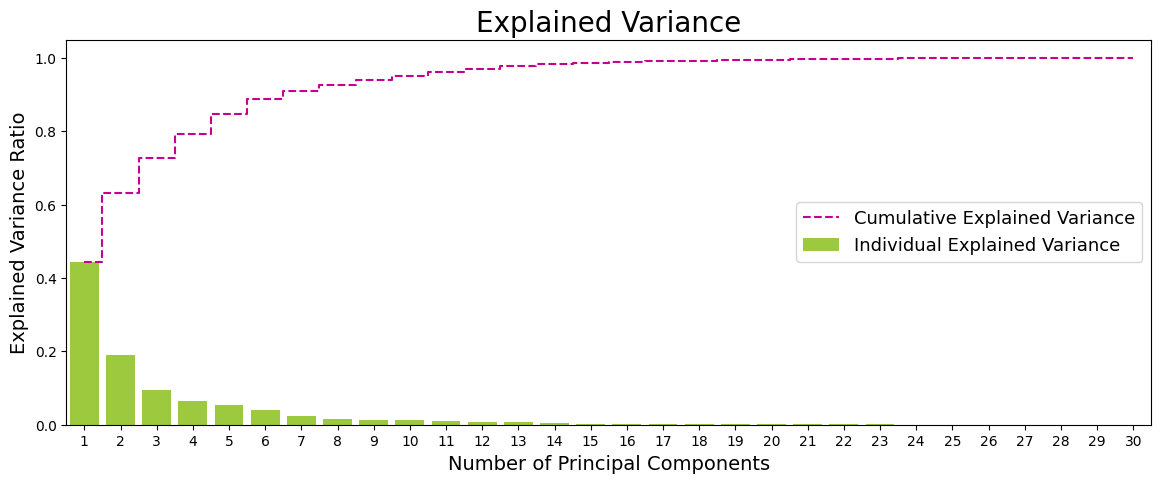

In [31]:
"Cell code source: https://www.kaggle.com/code/beyzanks/principal-component-analysis-pca-rf-knn/notebook"
fig, ax = plt.subplots(figsize=(14, 5))
plt.plot(range(X.shape[1]), pca.explained_variance_ratio_.cumsum(), linestyle='--', drawstyle='steps-mid', color='#c4008f', label='Cumulative Explained Variance')
sns.barplot(x=np.arange(1,X.shape[1]+1), y=pca.explained_variance_ratio_, alpha=0.85, color='#96db01', label='Individual Explained Variance')
plt.ylabel('Explained Variance Ratio', fontsize = 14)
plt.xlabel('Number of Principal Components', fontsize = 14)
ax.set_title('Explained Variance', fontsize = 20)
plt.legend(loc='center right', fontsize = 13)

In [32]:
print("Rate of explained variance for the first k PCs:")
for k in range(1,15):
    PCsum = sum(pca.explained_variance_ratio_[:k])
    print(str(k) + " PCs: " + str(PCsum))

Rate of explained variance for the first k PCs:
1 PCs: 0.44272025607526294
2 PCs: 0.632432076515594
3 PCs: 0.7263637090899079
4 PCs: 0.7923850582446095
5 PCs: 0.8473427431680722
6 PCs: 0.8875879635669056
7 PCs: 0.9100953006967307
8 PCs: 0.925982538696944
9 PCs: 0.9398790324425351
10 PCs: 0.9515688143366666
11 PCs: 0.9613660042126468
12 PCs: 0.9700713832200257
13 PCs: 0.978116633091993
14 PCs: 0.9833502905469194


Using just the 10 first PCs, we have >95% of the variation of the dataset. According to the criteria we defined a few cells above, these 10 PCs (features) are the ones we'll be selecting for our model training.

In [33]:
# Creating "Pipeline" object and adding PCA with 10 PCs (PCA(10))
pipe = Pipeline([
    ('scale', StandardScaler()),
    ('pca', PCA(10)),
    ('clf', KNeighborsClassifier(n_neighbors=best_k))
])

neigh = KNeighborsClassifier(n_neighbors = best_k)
cv = StratifiedKFold(n_splits=5, random_state=1, shuffle=True)
scores = cross_val_score(pipe, X, y, scoring='f1', cv=cv)

knn_score = np.mean(scores)
print(knn_score)

0.9371952520053786


Some references:

- https://www.kaggle.com/code/shrutimechlearn/step-by-step-diabetes-classification-knn-detailed
- https://www.kaggle.com/code/beyzanks/principal-component-analysis-pca-rf-knn/notebook
- Machine Learning with Python Course (IBM)